Data Cleaning

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Removing Irrelevant Features


In [34]:
df = pd.read_csv(r'datasets\assignTTSWING.csv')

irrelevant_cols = [
    'id', 'date', 'testmode', 'teststage', 'fileindex', 'count']
df = df.drop(columns=irrelevant_cols)

In [36]:
missing_report = df.isnull().sum()
print(missing_report[missing_report > 0])


Series([], dtype: int64)


In [37]:
# Define the ordered categories
ordinal_map = {'low': 0, 'medium': 1, 'high': 2}

# Apply encoding
for col in ['age', 'playYears', 'height', 'weight']:
    df[col] = df[col].map(ordinal_map)


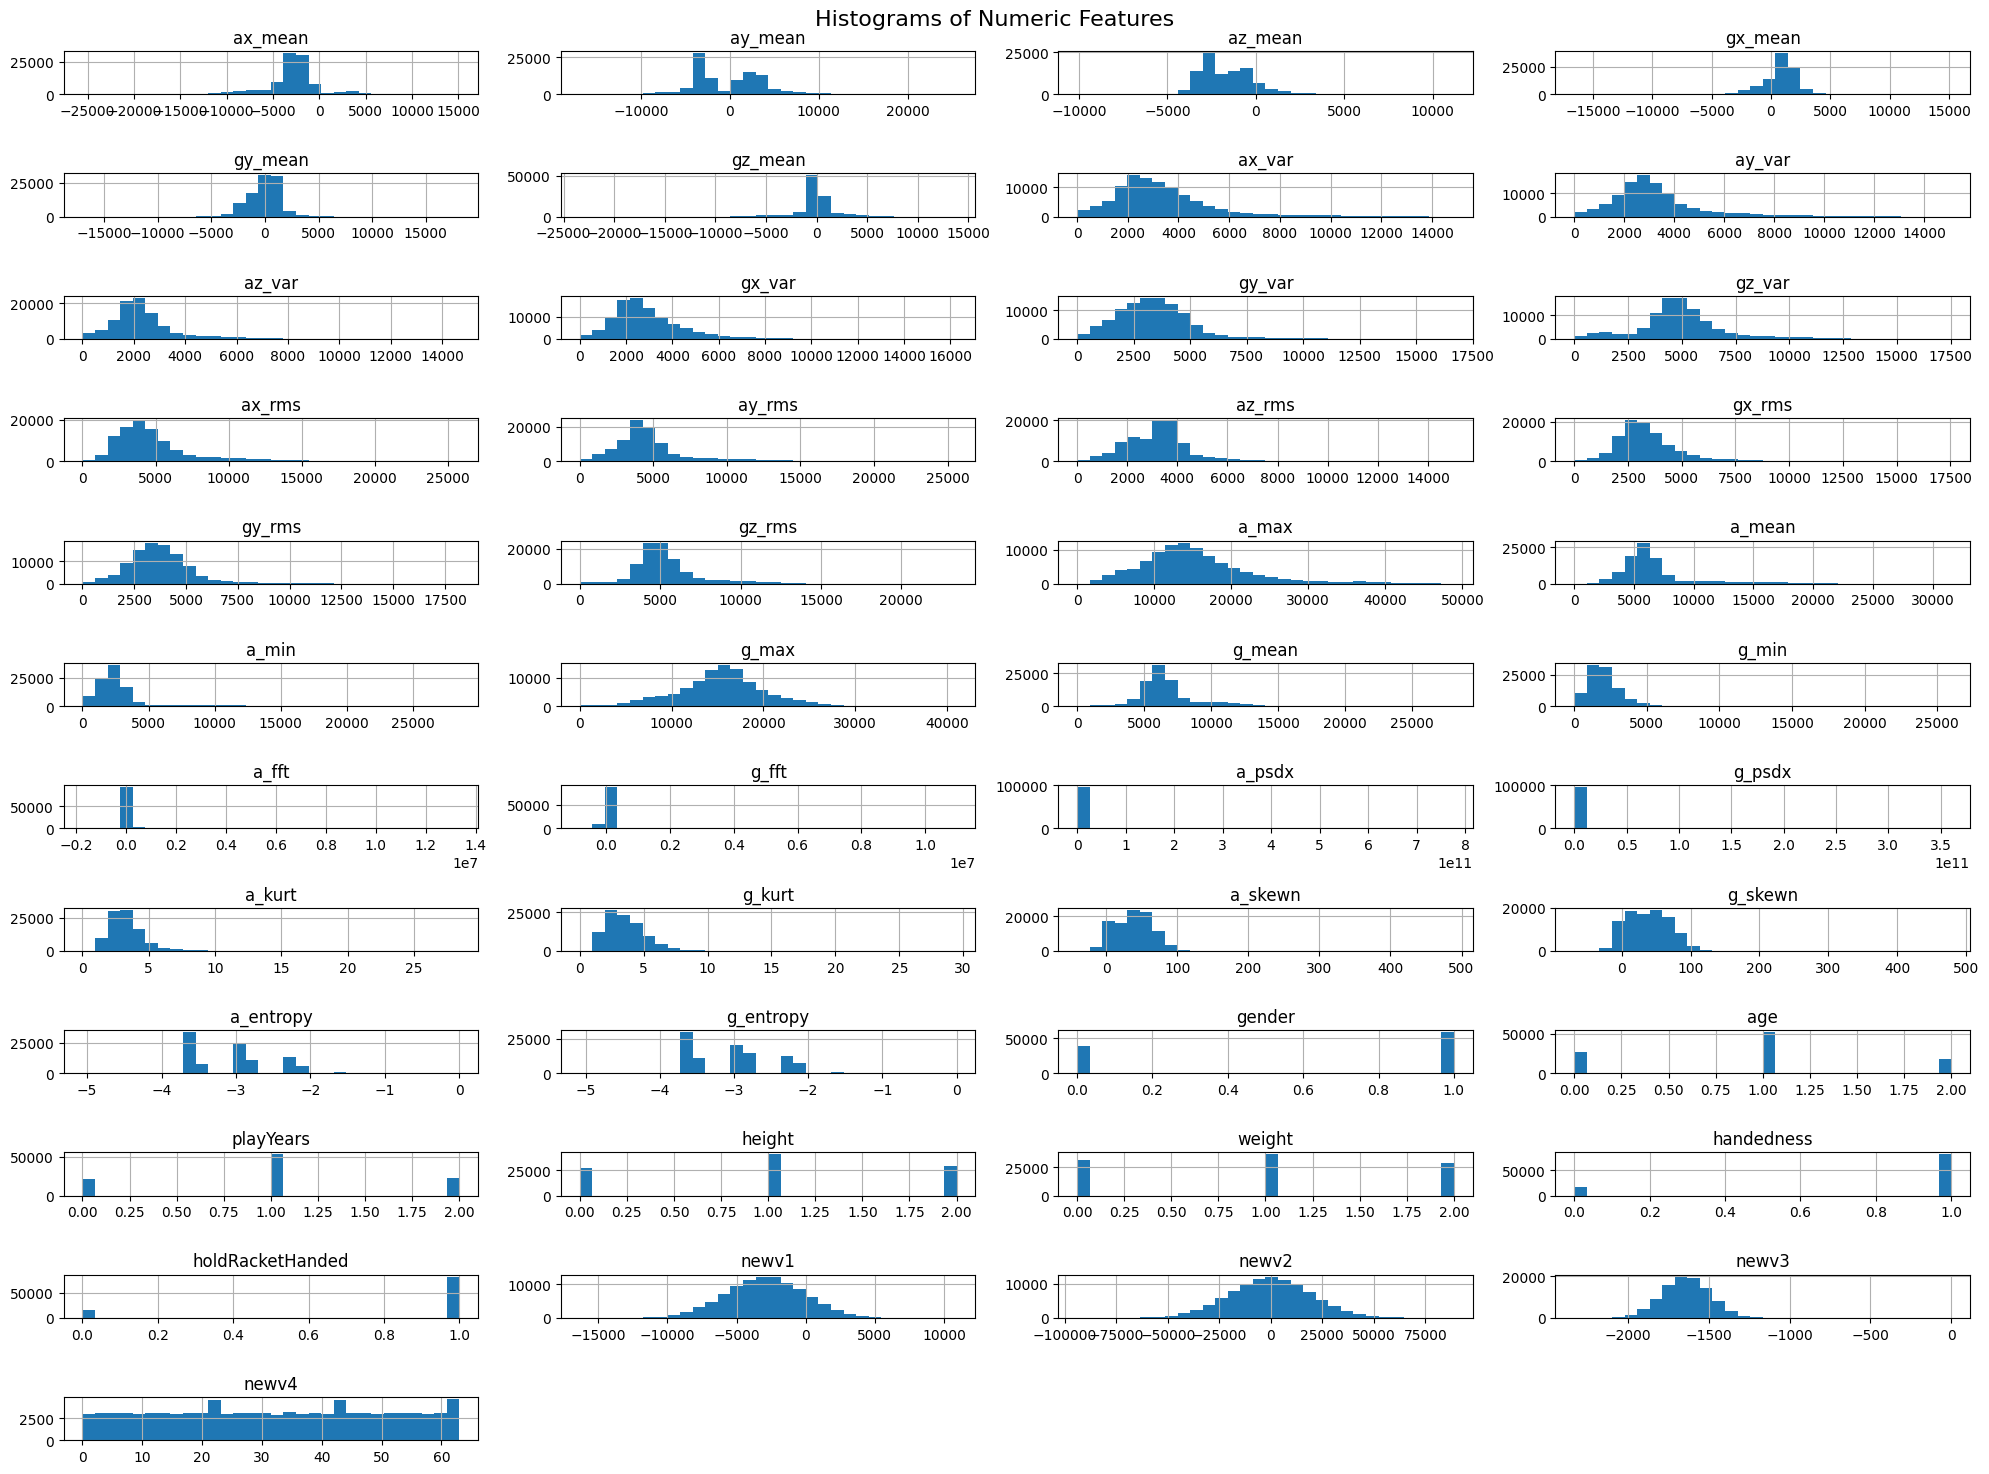

In [38]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
df[numeric_cols].hist(bins=30, figsize=(20, 15), layout=(len(numeric_cols)//4 + 1, 4))
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [39]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
exclude_cols = ['gender', 'handedness', 'holdRacketHanded']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Calculate IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Create boolean DataFrame where True means that value is an outlier
outlier_mask = (df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))

# Count number of outlier features per row
outlier_counts = outlier_mask.sum(axis=1)

# Keep rows where fewer than 6 features are outliers
mask = outlier_counts < 8

# Apply mask to filter dataframe
df_clean = df[mask].reset_index(drop=True)

print(f"Removed {len(df) - len(df_clean)} rows with 6 or more outlier features. Remaining rows: {len(df_clean)}")


Removed 10992 rows with 6 or more outlier features. Remaining rows: 86363


C:\Users\gavin\AppData\Local\Temp\ipykernel_1324\2850378145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='playYears', data=df, palette='viridis')


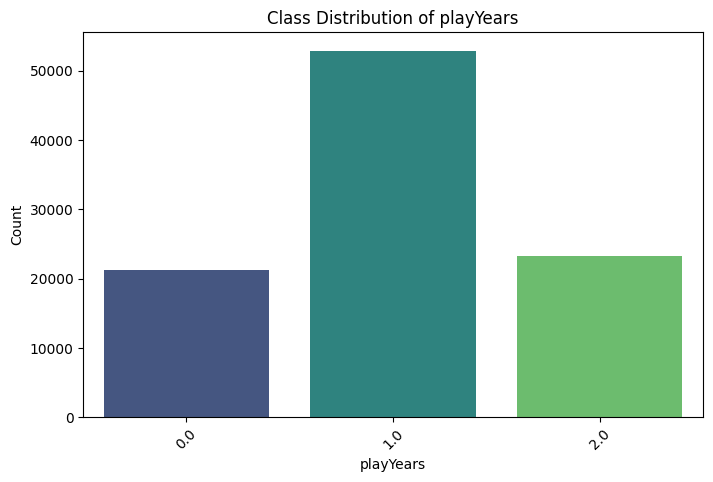

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x='playYears', data=df, palette='viridis')
plt.title('Class Distribution of playYears')
plt.xlabel('playYears')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate if category names are long
plt.show()

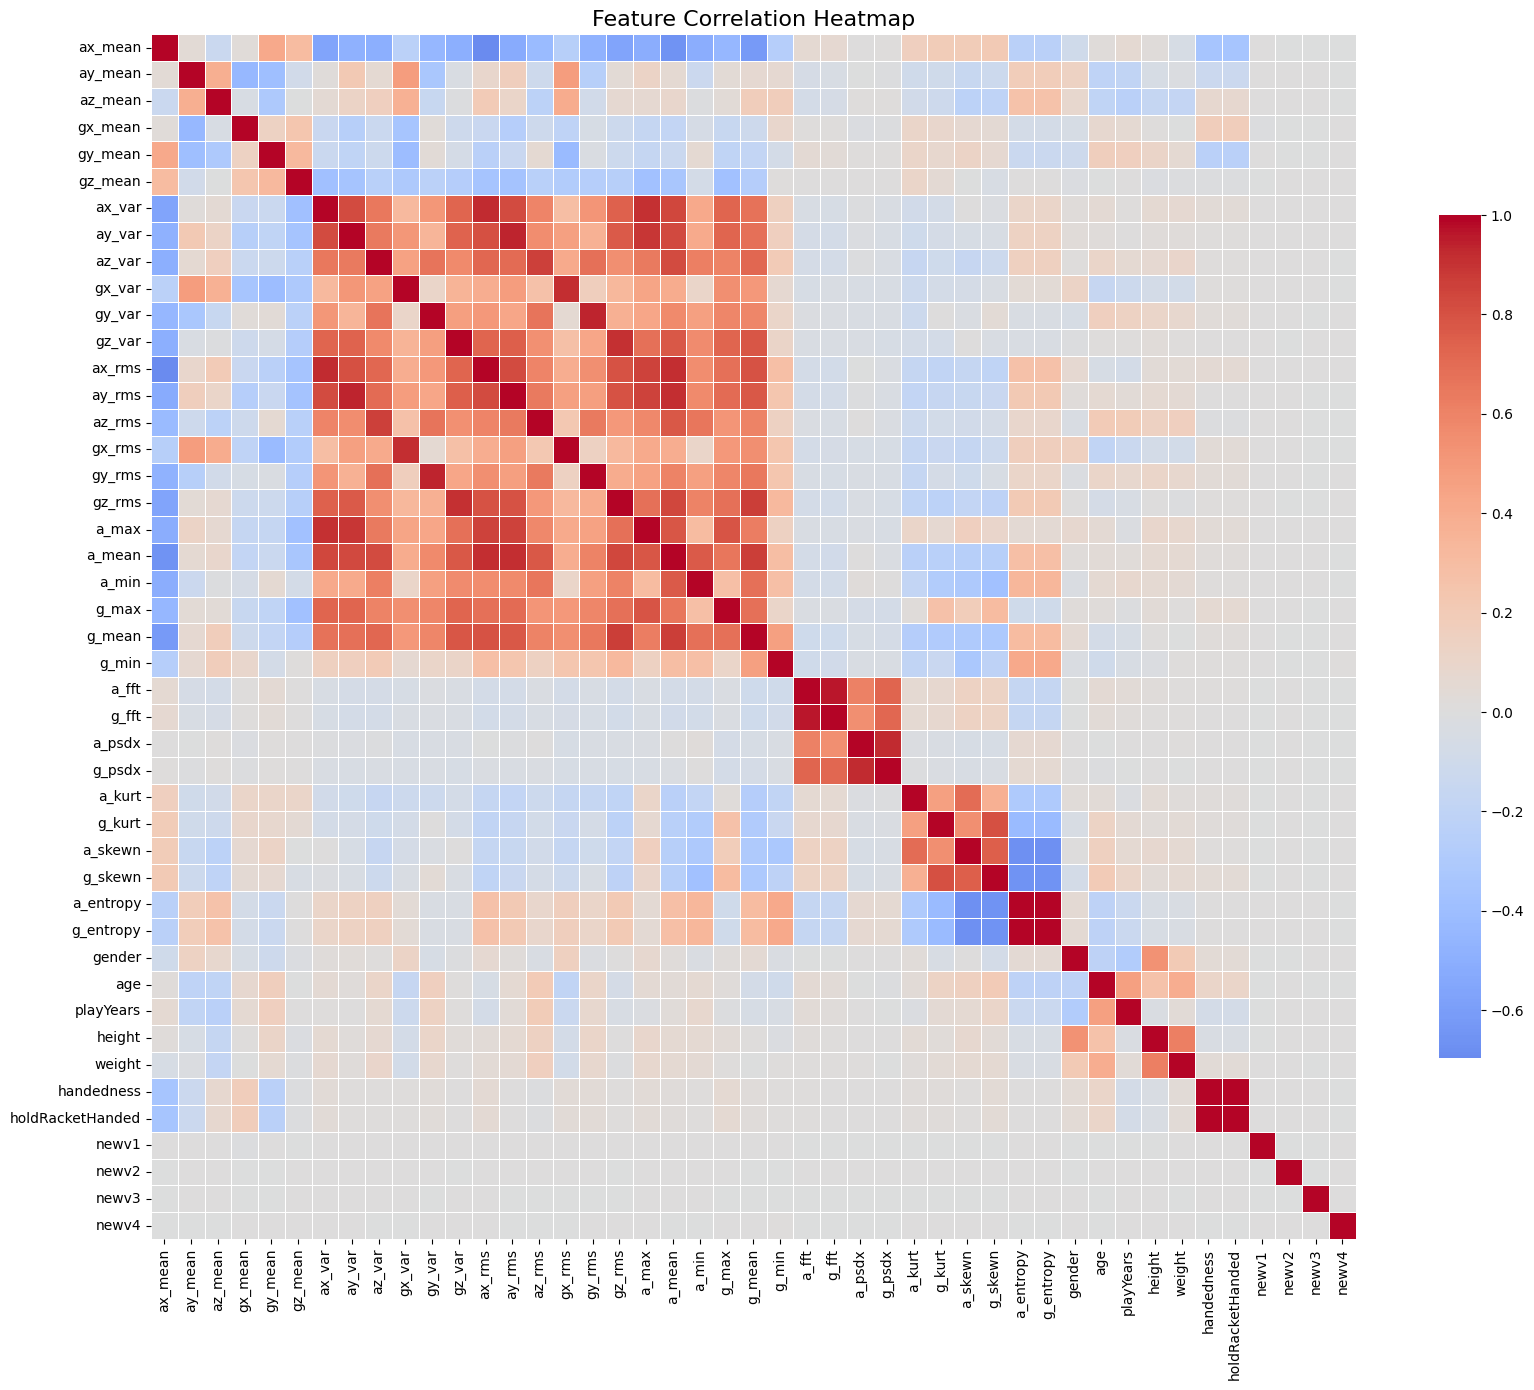

In [32]:
# Assuming df is your cleaned DataFrame with numeric features only
# Drop any non-numeric columns before computing correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f", 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.7})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [42]:
df_clean.to_csv(r'datasets\assignTTSWING_cleaned.csv', index=False)